<a href="https://colab.research.google.com/github/kimjoe1850/Lectures/blob/main/NLP/4.%20%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 문서 유사도 측정

* 문서와 문서 간의 유사도 비교를 위해 유클리드 거리, 자카드 유사도 그리고 코사인 유사도 계산

In [1]:
import nltk
nltk.download("punkt") # 딕셔너리 패키지
nltk.download("wordnet") # 딕셔너리 패키지
nltk.download('omw-1.4')

from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer # 간단하게 돌리기
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# document 설정(예시용)
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death.'

corpus = [d1,d2,d3]
print(corpus)

['Think like a man of action and act like man of thought.', 'Try no to become a man of success but rather try to become a man of value.', 'Give me liberty, of give me death.']


In [3]:
import pandas as pd

# bag of words(bow)
vector = CountVectorizer(stop_words = 'english')
bow = vector.fit_transform(corpus)

columns = []
for k,v in sorted(vector.vocabulary_.items(), key = lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns)
df

,act,action,death,liberty,like,man,success,think,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


### 유클리드 거리(Euclidean distance)

* 다차원 공간에서 두개의 점 $p$와 $q$ 사이의 거리를 계산하는 방법

$$ \sqrt{\sum_{i=1}^{n}\left (q_i - p_i \right)^2} $$


In [4]:
import numpy as np

def euclidean_distance(p,q):
  return np.sqrt(np.sum((q-p)**2))

In [5]:
# 각 문서들 간의 bow를 이용한 유클리디안 거리
print(euclidean_distance(bow[0].toarray(),bow[1].toarray()))
print(euclidean_distance(bow[0].toarray(),bow[2].toarray()))
print(euclidean_distance(bow[1].toarray(),bow[2].toarray()))

# 문자들의 count를 이용해 계산한, 어느 정도 한계 존재

3.7416573867739413
3.7416573867739413
3.4641016151377544


### 자카드 유사도(Jaccard Similarity)

* 두 텍스트 문서 사이에 **공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율**을 사용

$$ jaccard(A, B)=\frac{\left | A\cap B \right |}{\left | A\cup B \right |}=\frac{\left | A\cap B \right |}{\left | A \left |+ \right | B \right | - \left | A\cap B \right |} $$


In [6]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  # 입력으로 넣는 document 소문자화
  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)] 
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  # 분자(교집합)
  inter = len(set(words1).intersection(set(words2)))
  # 분모(합집합)
  union = len(set(words1).union(set(words2)))

  return inter/union

In [7]:
# 각 문서의 자카드 유사도
print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


### 코사인 유사도(Cosine Similarity)

* 가장 많이 사용되는 유사도
* 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

$$ cosine(A, B)=\frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}=\frac{\sum_{i=1}^{N}A_i\times B_i}{\sqrt{\sum_{i=1}^{N}\left (A_i \right)^2}\times \sqrt{\sum_{i=1}^{N}\left (B_i \right)^2}} $$

In [8]:
# tfidf 변환
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(corpus)

# 각 문서들 간 코사인 유사도
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1]))
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[2]))
print(cosine_similarity(tfidf_vectors[1], tfidf_vectors[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 군집화(Clustering)

* 리뷰 데이터 다운로드 (http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip)

In [9]:
# 데이터 가져오기
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip

--2023-01-27 11:35:16--  http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773840 (756K) [application/x-httpd-php]
Saving to: ‘OpinosisDataset1.0.zip’

OpinosisDataset1.0. 100%[===================>] 755.70K  --.-KB/s    in 0.1s    

2023-01-27 11:35:16 (5.03 MB/s) - ‘OpinosisDataset1.0.zip’ saved [773840/773840]



In [ ]:
# 압축 풀어주기
!unzip OpinosisDataset1.0.zip

In [11]:
# 포함된 데이터 확인
!ls OpinosisDataset1.0/topics

accuracy_garmin_nuvi_255W_gps.txt.data
bathroom_bestwestern_hotel_sfo.txt.data
battery-life_amazon_kindle.txt.data
battery-life_ipod_nano_8gb.txt.data
battery-life_netbook_1005ha.txt.data
buttons_amazon_kindle.txt.data
comfort_honda_accord_2008.txt.data
comfort_toyota_camry_2007.txt.data
directions_garmin_nuvi_255W_gps.txt.data
display_garmin_nuvi_255W_gps.txt.data
eyesight-issues_amazon_kindle.txt.data
features_windows7.txt.data
fonts_amazon_kindle.txt.data
food_holiday_inn_london.txt.data
food_swissotel_chicago.txt.data
free_bestwestern_hotel_sfo.txt.data
gas_mileage_toyota_camry_2007.txt.data
interior_honda_accord_2008.txt.data
interior_toyota_camry_2007.txt.data
keyboard_netbook_1005ha.txt.data
location_bestwestern_hotel_sfo.txt.data
location_holiday_inn_london.txt.data
mileage_honda_accord_2008.txt.data
navigation_amazon_kindle.txt.data
parking_bestwestern_hotel_sfo.txt.data
performance_honda_accord_2008.txt.data
performance_netbook_1005ha.txt.data
price_amazon_kindle.txt.data
pri

In [12]:
# 데이터를 데이터프레임으로 병합
import pandas as pd
import glob, os

# 데이터 합치기 기본 과정
path = r'./OpinosisDataset1.0/topics/'
files = glob.glob(os.path.join(path,'*.data')) # .data가 들어간 파일만 받아오기
filenames = []
opinions = []


for file_ in files:
  # 파일의 이름들만 가져오기(filenames)
  filename = file_.split('/')[-1] # path의 마지막 부분인 ~~.txt.data 부분만 가져오기
  filename = filename.split('.')[0] # 위의 filename에서 txt.data 제외한 ~~부분만 가져오기
  filenames.append(filename)

  # 파일 안 데이터들 모으기(opinions)
  df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
  opinions.append(df.to_string())

opinion_df = pd.DataFrame({'filename':filenames, 'opinion':opinions})
opinion_df

,filename,opinion
0,eyesight-issues_amazon_kindle,...
1,screen_ipod_nano_8gb,...
2,free_bestwestern_hotel_sfo,...
3,screen_garmin_nuvi_255W_gps,...
4,food_holiday_inn_london,...
5,location_holiday_inn_london,...
6,performance_netbook_1005ha,...
7,battery-life_netbook_1005ha,...
8,interior_toyota_camry_2007,...
9,speed_windows7,...


In [13]:
# 모아둔 데이터의 opinion 부분 tfidf, vectorizer 통해 어떤 단어들 나오는지 확인
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)

tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])
feature_names = tfidf.get_feature_names_out()
print(feature_names)

['00' '000' '000 miles' ... 'yes rooms' 'yields' 'zoom']


### DBSCAN 알고리즘

* 밀도 기반의 군집화 알고리즘
* 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
* 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
* 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건함
* K-means에 비해 속도가 느리고, 파라미터 값인 epsilon, min_sampels 값에 영향을 많이 받음

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=3, metric='cosine')
dbscan_label = dbscan.fit_predict(tfidf_vectors)
print(dbscan_label) # -1: 이상치로 판단, min_samples 조정 통해 변경 가능

[-1  0 -1  0  1  1  2  2  3 -1 -1 -1  1  2  1  3 -1 -1  0  2  1 -1  1 -1
 -1  1  1 -1  1  0  1 -1  0  0  0  2  3  1  1 -1 -1  0  1 -1  3  3 -1 -1
 -1 -1  0]


In [15]:
# cluster이라는 새로운 열에 dbscan결과 저장
opinion_df['cluster'] = dbscan_label
opinion_df

,filename,opinion,cluster
0,eyesight-issues_amazon_kindle,...,-1
1,screen_ipod_nano_8gb,...,0
2,free_bestwestern_hotel_sfo,...,-1
3,screen_garmin_nuvi_255W_gps,...,0
4,food_holiday_inn_london,...,1
5,location_holiday_inn_london,...,1
6,performance_netbook_1005ha,...,2
7,battery-life_netbook_1005ha,...,2
8,interior_toyota_camry_2007,...,3
9,speed_windows7,...,-1


In [16]:
# cluster number가 일치하는 것만 가져오게 하기
for cluster_num in set(dbscan_label):
  print('Cluster : {}'.format(cluster_num))
  df = opinion_df[opinion_df['cluster'] == cluster_num]
  for filename in df['filename']:
    print(filename)
  print()
# cluster 0, -1의 경우 outlier로 주로 판단

Cluster : 0
screen_ipod_nano_8gb
screen_garmin_nuvi_255W_gps
keyboard_netbook_1005ha
video_ipod_nano_8gb
screen_netbook_1005ha
display_garmin_nuvi_255W_gps
voice_garmin_nuvi_255W_gps
size_asus_netbook_1005ha
speed_garmin_nuvi_255W_gps

Cluster : 1
food_holiday_inn_london
location_holiday_inn_london
service_swissotel_hotel_chicago
price_holiday_inn_london
food_swissotel_chicago
rooms_bestwestern_hotel_sfo
room_holiday_inn_london
service_holiday_inn_london
rooms_swissotel_chicago
service_bestwestern_hotel_sfo
bathroom_bestwestern_hotel_sfo
price_amazon_kindle
location_bestwestern_hotel_sfo

Cluster : 2
performance_netbook_1005ha
battery-life_netbook_1005ha
battery-life_amazon_kindle
battery-life_ipod_nano_8gb
performance_honda_accord_2008

Cluster : 3
interior_toyota_camry_2007
comfort_toyota_camry_2007
seats_honda_accord_2008
interior_honda_accord_2008
comfort_honda_accord_2008

Cluster : -1
eyesight-issues_amazon_kindle
free_bestwestern_hotel_sfo
speed_windows7
satellite_garmin_nuvi_25

### K-means 알고리즘

* 대표적인 군집화 알고리즘
* 클러스터 수 k를 직접 지정해야 함
* 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법
* 노이즈 데이터에 취약하고, 중심점(centroid)을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있음

In [17]:
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 42)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

print(kmeans_label) # 51개의 각 데이터들 중 0,1,2의 3개의 군집(k=3)으로 묶음
pd.DataFrame(kmeans_centers) # 각 문서의 4400개의 단어들이 3개의 cluster(0,1,2)로 나뉘어 있음

[0 0 1 0 1 1 0 0 2 0 0 0 1 0 1 2 0 0 0 0 1 1 1 1 2 1 1 0 1 0 1 0 0 0 0 2 2
 1 1 2 2 0 1 0 2 2 0 1 2 0 0]


,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.000797,0.000000,0.00000,0.000000,0.000000,0.000574,0.000000,0.000000,0.000000,0.00331,...,0.005517,0.003637,0.005069,0.002542,0.001848,0.000000,0.002620,0.00000,0.000429,0.007645
1,0.004997,0.000000,0.00000,0.000000,0.000184,0.000000,0.000000,0.000807,0.001627,0.00000,...,0.001892,0.000964,0.002957,0.000814,0.000659,0.000895,0.003746,0.00156,0.000000,0.000000
2,0.000932,0.007161,0.00486,0.003372,0.003252,0.004269,0.007004,0.000000,0.000000,0.00000,...,0.004123,0.002509,0.005445,0.000000,0.000000,0.002379,0.001887,0.00000,0.002924,0.000000


In [18]:
print(tfidf_vectors.shape)

(51, 4400)


In [19]:
# cluster이라는 새로운 열에 kmeans 결과 저장
opinion_df['cluster'] = kmeans_label
opinion_df

,filename,opinion,cluster
0,eyesight-issues_amazon_kindle,...,0
1,screen_ipod_nano_8gb,...,0
2,free_bestwestern_hotel_sfo,...,1
3,screen_garmin_nuvi_255W_gps,...,0
4,food_holiday_inn_london,...,1
5,location_holiday_inn_london,...,1
6,performance_netbook_1005ha,...,0
7,battery-life_netbook_1005ha,...,0
8,interior_toyota_camry_2007,...,2
9,speed_windows7,...,0


In [20]:
# cluster number가 일치하는 것만 가져오게 하기
for cluster_num in set(kmeans_label):
  print('Cluster : {}'.format(cluster_num))
  df = opinion_df[opinion_df['cluster'] == cluster_num]
  for filename in df['filename']:
    print(filename)
  print()
# cluster 0, -1의 경우 outlier로 주로 판단

Cluster : 0
eyesight-issues_amazon_kindle
screen_ipod_nano_8gb
screen_garmin_nuvi_255W_gps
performance_netbook_1005ha
battery-life_netbook_1005ha
speed_windows7
satellite_garmin_nuvi_255W_gps
directions_garmin_nuvi_255W_gps
battery-life_amazon_kindle
buttons_amazon_kindle
fonts_amazon_kindle
keyboard_netbook_1005ha
battery-life_ipod_nano_8gb
navigation_amazon_kindle
video_ipod_nano_8gb
features_windows7
screen_netbook_1005ha
display_garmin_nuvi_255W_gps
voice_garmin_nuvi_255W_gps
size_asus_netbook_1005ha
sound_ipod_nano_8gb
updates_garmin_nuvi_255W_gps
accuracy_garmin_nuvi_255W_gps
speed_garmin_nuvi_255W_gps

Cluster : 1
free_bestwestern_hotel_sfo
food_holiday_inn_london
location_holiday_inn_london
service_swissotel_hotel_chicago
price_holiday_inn_london
food_swissotel_chicago
staff_swissotel_chicago
rooms_bestwestern_hotel_sfo
parking_bestwestern_hotel_sfo
room_holiday_inn_london
service_holiday_inn_london
rooms_swissotel_chicago
service_bestwestern_hotel_sfo
bathroom_bestwestern_hote

In [21]:
centroid_feature = kmeans_centers.argsort()[:,::-1] 
# 배열값 큰 순으로 정렬된 Index값 반환시키기 위해서 역으로(-1) 취해줌
# centroid 별로 어떤 word가 할당되어 있는지 거리가 큰순으로 값을 구하기 위해서 정렬(argsort)

for cluster_num in set(kmeans_label):
  print("Cluster : {}".format(cluster_num))

  # 각 군집들의 파일 이름
  df = opinion_df[opinion_df['cluster'] == cluster_num]
  print(df['filename'].tolist())

  # top_feature가 각 cluster를 형성하게 되는 중요한 feature들
  top_feature_indexes = centroid_feature[cluster_num, :10] # 10개만 추출
  top_features = [feature_names[i] for i in top_feature_indexes]
  print(top_features)

  # top_feature의 중심 위치에 대한 상대값 - center기준으로 얼마나 차이가 나느냐
  top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
  print(top_feature_values)
  print()

  # cluster2의 경우 전자제품의 top feature들로 되어있음(battery, life, screen,speed, voice...)
  # cluster0의 경우 자동차의 top feature(interior, seats, gas, transmission,...)

Cluster : 0
['eyesight-issues_amazon_kindle', 'screen_ipod_nano_8gb', 'screen_garmin_nuvi_255W_gps', 'performance_netbook_1005ha', 'battery-life_netbook_1005ha', 'speed_windows7', 'satellite_garmin_nuvi_255W_gps', 'directions_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'buttons_amazon_kindle', 'fonts_amazon_kindle', 'keyboard_netbook_1005ha', 'battery-life_ipod_nano_8gb', 'navigation_amazon_kindle', 'video_ipod_nano_8gb', 'features_windows7', 'screen_netbook_1005ha', 'display_garmin_nuvi_255W_gps', 'voice_garmin_nuvi_255W_gps', 'size_asus_netbook_1005ha', 'sound_ipod_nano_8gb', 'updates_garmin_nuvi_255W_gps', 'accuracy_garmin_nuvi_255W_gps', 'speed_garmin_nuvi_255W_gps']
['screen', 'battery', 'battery life', 'keyboard', 'life', 'directions', 'size', 'voice', 'video', 'speed']
[0.14331864877505052, 0.1250731700665076, 0.0672294213324878, 0.06613346001490684, 0.06254132118078295, 0.05661982133519256, 0.052968271845343556, 0.050318178743661714, 0.04972046338828644, 0.049332791984

In [23]:
# PCA를 통한 다차원 ->2차원으로 축소
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42) # 2차원으로 축소
pca_vecs = pca.fit_transform(tfidf_vectors.toarray())
# 좌표값들 저장
opinion_df['x0'] = pca_vecs[:,0]
opinion_df['x1'] = pca_vecs[:,1]

# PCA 기준 좌표값 매칭
cluster_map = {0:'Electronic devices', 1:"Accommodation", 2:"Car"}
opinion_df['cluster'] = opinion_df['cluster'].map(cluster_map)
opinion_df

,filename,opinion,cluster,x0,x1
0,eyesight-issues_amazon_kindle,...,Electronic devices,-0.160268,-0.081306
1,screen_ipod_nano_8gb,...,Electronic devices,-0.348631,-0.273882
2,free_bestwestern_hotel_sfo,...,Accommodation,0.122083,-0.023664
3,screen_garmin_nuvi_255W_gps,...,Electronic devices,-0.327443,-0.234906
4,food_holiday_inn_london,...,Accommodation,0.347007,-0.082186
5,location_holiday_inn_london,...,Accommodation,0.360057,-0.071092
6,performance_netbook_1005ha,...,Electronic devices,-0.260753,-0.073663
7,battery-life_netbook_1005ha,...,Electronic devices,-0.385006,-0.419500
8,interior_toyota_camry_2007,...,Car,-0.106769,0.495964
9,speed_windows7,...,Electronic devices,-0.087121,0.005568


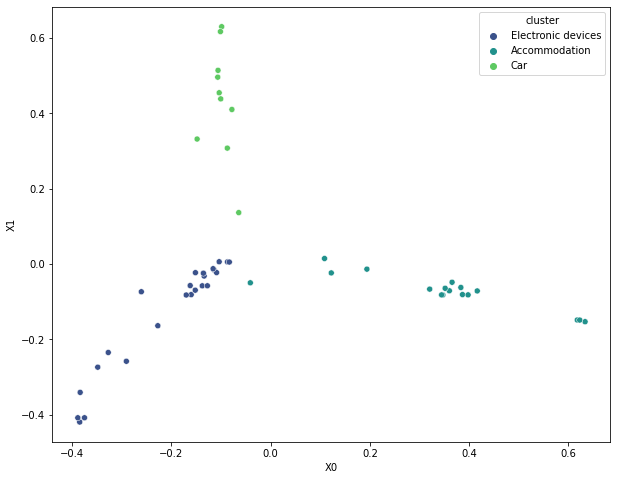

In [25]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel("X0")
plt.ylabel("X1")
sns.scatterplot(data = opinion_df, x='x0', y='x1', hue = 'cluster', palette = 'viridis')

### 리뷰 문서 유사도 측정

In [26]:
opinion_df

,filename,opinion,cluster,x0,x1
0,eyesight-issues_amazon_kindle,...,Electronic devices,-0.160268,-0.081306
1,screen_ipod_nano_8gb,...,Electronic devices,-0.348631,-0.273882
2,free_bestwestern_hotel_sfo,...,Accommodation,0.122083,-0.023664
3,screen_garmin_nuvi_255W_gps,...,Electronic devices,-0.327443,-0.234906
4,food_holiday_inn_london,...,Accommodation,0.347007,-0.082186
5,location_holiday_inn_london,...,Accommodation,0.360057,-0.071092
6,performance_netbook_1005ha,...,Electronic devices,-0.260753,-0.073663
7,battery-life_netbook_1005ha,...,Electronic devices,-0.385006,-0.419500
8,interior_toyota_camry_2007,...,Car,-0.106769,0.495964
9,speed_windows7,...,Electronic devices,-0.087121,0.005568


In [29]:
# tfidf
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
tfidf_vectors = tfidf.fit_transform(opinion_df['opinion'])

word_id_list = sorted(tfidf.vocabulary_.items(), key = lambda x:x[1], reverse = False)
word_list = [x[0] for x in word_id_list]

tf_idf_df = pd.DataFrame(tfidf_vectors.toarray(),
                         columns = word_list,
                         index = opinion_df['filename'])
tf_idf_df

,00,000,000 miles,05,06,07,08,10 did,10 great,10 inch,...,year,year old,years,years ago,years old,yellow,yes,yes rooms,yields,zoom
filename,,,,,,,,,,,,,,,,,,,,,
eyesight-issues_amazon_kindle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009377,0.011827,0.017006,0.013771,0.016025,0.000000,0.000000,0.000000,0.000000,0.000000
screen_ipod_nano_8gb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040457,0.017008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
free_bestwestern_hotel_sfo,0.020629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005867,0.000000,0.000000,0.000000
screen_garmin_nuvi_255W_gps,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039177
food_holiday_inn_london,0.008247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011514,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
location_holiday_inn_london,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001935,0.000000,0.001755,0.000000,0.000000,0.000000,0.012935,0.003307,0.000000,0.000000
performance_netbook_1005ha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
battery-life_netbook_1005ha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001873,0.002363,0.003397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
interior_toyota_camry_2007,0.000000,0.010542,0.011150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023789,0.000000,0.000000,0.011895,0.000000


In [32]:
# 코사인 유사도
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df),
                          columns = opinion_df['filename'],
                          index = opinion_df['filename'])
cos_sim_df

filename,eyesight-issues_amazon_kindle,screen_ipod_nano_8gb,free_bestwestern_hotel_sfo,screen_garmin_nuvi_255W_gps,food_holiday_inn_london,location_holiday_inn_london,performance_netbook_1005ha,battery-life_netbook_1005ha,interior_toyota_camry_2007,speed_windows7,...,size_asus_netbook_1005ha,location_bestwestern_hotel_sfo,sound_ipod_nano_8gb,interior_honda_accord_2008,comfort_honda_accord_2008,updates_garmin_nuvi_255W_gps,staff_bestwestern_hotel_sfo,gas_mileage_toyota_camry_2007,accuracy_garmin_nuvi_255W_gps,speed_garmin_nuvi_255W_gps
filename,,,,,,,,,,,,,,,,,,,,,
eyesight-issues_amazon_kindle,1.000000,0.142230,0.021101,0.152143,0.009289,0.009252,0.022658,0.021521,0.014154,0.025990,...,0.117026,0.009130,0.032336,0.015615,0.022166,0.032066,0.008265,0.008045,0.029981,0.021518
screen_ipod_nano_8gb,0.142230,1.000000,0.007460,0.609272,0.006474,0.010405,0.051334,0.102721,0.026050,0.031825,...,0.281784,0.007185,0.198801,0.030047,0.027473,0.043120,0.005378,0.009177,0.034746,0.060017
free_bestwestern_hotel_sfo,0.021101,0.007460,1.000000,0.013596,0.056830,0.065642,0.023572,0.018527,0.005969,0.015698,...,0.017163,0.088747,0.008110,0.005943,0.010472,0.069374,0.135214,0.005679,0.009753,0.009864
screen_garmin_nuvi_255W_gps,0.152143,0.609272,0.013596,1.000000,0.013396,0.019132,0.037863,0.039612,0.015629,0.026302,...,0.218007,0.016358,0.039537,0.024197,0.028280,0.179234,0.009634,0.012315,0.139706,0.268321
food_holiday_inn_london,0.009289,0.006474,0.056830,0.013396,1.000000,0.176030,0.007820,0.008116,0.008641,0.038942,...,0.015069,0.101489,0.011849,0.009923,0.018366,0.007005,0.112221,0.007195,0.011448,0.012136
location_holiday_inn_london,0.009252,0.010405,0.065642,0.019132,0.176030,1.000000,0.008722,0.008345,0.013234,0.012199,...,0.021707,0.679801,0.011120,0.011444,0.034358,0.008522,0.165492,0.009536,0.019810,0.019035
performance_netbook_1005ha,0.022658,0.051334,0.023572,0.037863,0.007820,0.008722,1.000000,0.374679,0.015635,0.117259,...,0.202991,0.008564,0.048186,0.024318,0.051940,0.036743,0.008015,0.031250,0.029673,0.043035
battery-life_netbook_1005ha,0.021521,0.102721,0.018527,0.039612,0.008116,0.008345,0.374679,1.000000,0.010101,0.039573,...,0.295015,0.007948,0.082583,0.009507,0.019206,0.023671,0.009537,0.007668,0.030564,0.012316
interior_toyota_camry_2007,0.014154,0.026050,0.005969,0.015629,0.008641,0.013234,0.015635,0.010101,1.000000,0.020955,...,0.019647,0.014129,0.031170,0.927009,0.263858,0.010194,0.008478,0.086356,0.009836,0.015408


In [43]:
# 호텔에 대한 자료들의 코사인 유사도 확인하기

# 호텔(Accommodation)의 자료들만 가져오기
hotel_indexes = opinion_df[opinion_df['cluster'] == "Accommodation"].index
print(hotel_indexes)

# 호텔에 해당하는 문서들 중 첫번째의 이름만 출력 -> 이 문서를 기준으로 다른 호텔 문서들과의 코사인 유사도 구할 예정
hotel_file_name = opinion_df.iloc[hotel_indexes[0]]['filename']
print(hotel_file_name, len(hotel_indexes))

# 호텔에 해당하는 자료들의 코사인 유사도
similarity = cosine_similarity(tfidf_vectors[hotel_indexes[0]], tfidf_vectors[hotel_indexes])
print(similarity)

Int64Index([2, 4, 5, 12, 14, 20, 21, 22, 23, 25, 26, 28, 30, 37, 38, 42, 47], dtype='int64')
free_bestwestern_hotel_sfo 17
[[1.         0.05683007 0.06564231 0.12058369 0.09206109 0.05770807
  0.07377276 0.08495642 0.11861565 0.11122014 0.09531352 0.05460209
  0.14377768 0.06208166 0.03249623 0.08874664 0.13521413]]


In [48]:
# 호텔들만의 코사인 유사도 결과를 정렬하여 코사인 유사도 큰 순으로 정렬
sorted_index = similarity.argsort()[:,::-1]
# 본인끼리의 코사인 유사도값(1)을 제외한 나머지만 출력
sorted_index = sorted_index[:,1:]
print(sorted_index)

# 위에서 정렬된 인덱스를 기반으로 호텔 관련 문서에 대한 본래 자료(opinion_df)에 있던 위치 인덱스
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
print(hotel_sorted_indexes)

# 그에 따른 similarity 정렬
hotel_1_similarity = np.sqrt(similarity.reshape(-1))[::-1]
hotel_1_similarity = hotel_1_similarity[1:]
print(hotel_1_similarity)

[[12 16  3  8  9 10  4 15  7  6  2 13  5  1 11 14]]
Int64Index([30, 47, 12, 23, 25, 26, 14, 42, 22, 21, 5, 37, 20, 4, 28, 38], dtype='int64')
[0.29790375 0.1802671  0.24916191 0.37918028 0.23367089 0.30872888
 0.33349683 0.34440623 0.29147284 0.2716114  0.24022503 0.3034157
 0.34725162 0.25620755 0.23839057 1.        ]


In [60]:
df = pd.DataFrame({'similarity' : hotel_1_similarity},
                  index = opinion_df.iloc[hotel_sorted_indexes]['filename'])
df

,similarity
filename,
service_bestwestern_hotel_sfo,0.297904
staff_bestwestern_hotel_sfo,0.180267
service_swissotel_hotel_chicago,0.249162
parking_bestwestern_hotel_sfo,0.379180
room_holiday_inn_london,0.233671
service_holiday_inn_london,0.308729
price_holiday_inn_london,0.333497
location_bestwestern_hotel_sfo,0.344406
rooms_bestwestern_hotel_sfo,0.291473


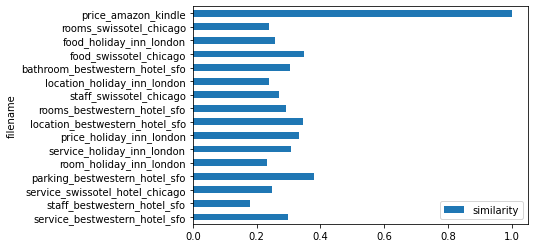

In [62]:
df.plot.barh()

## 계층적 군집화(Hierarchical Clustering)

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### 병합 군집화(Agglomerative Clustering)

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지(ward, average, complete)를 지정 가능

`ward`: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

In [64]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predict = ward.fit_predict(tfidf_vectors.toarray())
predict

array([0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0])

In [66]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,eyesight-issues_amazon_kindle,...,Electronic devices,-0.160268,-0.081306,0
1,screen_ipod_nano_8gb,...,Electronic devices,-0.348631,-0.273882,0
2,free_bestwestern_hotel_sfo,...,Accommodation,0.122083,-0.023664,0
3,screen_garmin_nuvi_255W_gps,...,Electronic devices,-0.327443,-0.234906,0
4,food_holiday_inn_london,...,Accommodation,0.347007,-0.082186,1
5,location_holiday_inn_london,...,Accommodation,0.360057,-0.071092,1
6,performance_netbook_1005ha,...,Electronic devices,-0.260753,-0.073663,0
7,battery-life_netbook_1005ha,...,Electronic devices,-0.385006,-0.419500,0
8,interior_toyota_camry_2007,...,Car,-0.106769,0.495964,2
9,speed_windows7,...,Electronic devices,-0.087121,0.005568,0


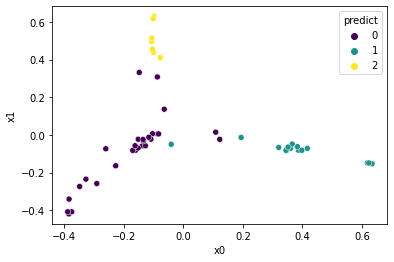

In [68]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue = 'predict', palette = 'viridis')

`average`: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

In [69]:
avg = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
predict = avg.fit_predict(tfidf_vectors.toarray())
predict

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0])

In [70]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,eyesight-issues_amazon_kindle,...,Electronic devices,-0.160268,-0.081306,0
1,screen_ipod_nano_8gb,...,Electronic devices,-0.348631,-0.273882,0
2,free_bestwestern_hotel_sfo,...,Accommodation,0.122083,-0.023664,1
3,screen_garmin_nuvi_255W_gps,...,Electronic devices,-0.327443,-0.234906,0
4,food_holiday_inn_london,...,Accommodation,0.347007,-0.082186,1
5,location_holiday_inn_london,...,Accommodation,0.360057,-0.071092,1
6,performance_netbook_1005ha,...,Electronic devices,-0.260753,-0.073663,0
7,battery-life_netbook_1005ha,...,Electronic devices,-0.385006,-0.419500,0
8,interior_toyota_camry_2007,...,Car,-0.106769,0.495964,2
9,speed_windows7,...,Electronic devices,-0.087121,0.005568,0


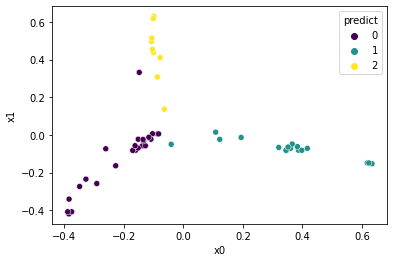

In [71]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue = 'predict', palette = 'viridis')

`complete`: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

In [72]:
comp = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
predict = comp.fit_predict(tfidf_vectors.toarray())
predict

array([0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 0, 0])

In [73]:
results = opinion_df
results['predict'] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,eyesight-issues_amazon_kindle,...,Electronic devices,-0.160268,-0.081306,0
1,screen_ipod_nano_8gb,...,Electronic devices,-0.348631,-0.273882,0
2,free_bestwestern_hotel_sfo,...,Accommodation,0.122083,-0.023664,2
3,screen_garmin_nuvi_255W_gps,...,Electronic devices,-0.327443,-0.234906,0
4,food_holiday_inn_london,...,Accommodation,0.347007,-0.082186,2
5,location_holiday_inn_london,...,Accommodation,0.360057,-0.071092,2
6,performance_netbook_1005ha,...,Electronic devices,-0.260753,-0.073663,1
7,battery-life_netbook_1005ha,...,Electronic devices,-0.385006,-0.419500,0
8,interior_toyota_camry_2007,...,Car,-0.106769,0.495964,1
9,speed_windows7,...,Electronic devices,-0.087121,0.005568,0


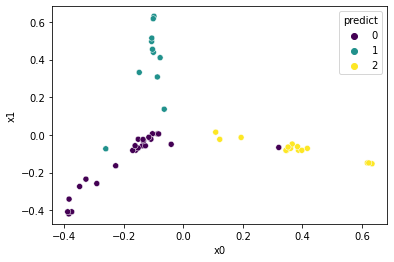

In [74]:
sns.scatterplot(x = 'x0', y = 'x1', data = results, hue = 'predict', palette = 'viridis')

### 덴드로그램(Dendrogram)
* 계층을 눈으로 확인하기 위해 사용하는 방법

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [75]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# 유클리디안 거리 이용 - 같으면 0
distmatrix = pdist(tfidf_vectors.toarray(), metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,1.309786,1.399213,1.302196,1.407630,1.407656,1.398100,1.398913,1.404169,1.395715,...,1.328890,1.407743,1.391161,1.403129,1.398452,1.391355,1.408357,1.408514,1.392852,1.398916
1,1.309786,0.000000,1.408929,0.883999,1.409628,1.406837,1.377437,1.339611,1.395672,1.391528,...,1.198512,1.409124,1.265858,1.392805,1.394652,1.383387,1.410406,1.407709,1.389427,1.371119
2,1.399213,1.408929,0.000000,1.404567,1.373441,1.367010,1.397446,1.401052,1.409987,1.403070,...,1.402025,1.350002,1.408467,1.410005,1.406789,1.364277,1.315132,1.410192,1.407300,1.407222
3,1.302196,0.883999,1.404567,0.000000,1.404709,1.400620,1.387182,1.385921,1.403119,1.395492,...,1.250594,1.402599,1.385975,1.396999,1.394073,1.281223,1.407385,1.405479,1.311712,1.209693
4,1.407630,1.409628,1.373441,1.404709,0.000000,1.283721,1.408673,1.408463,1.408090,1.386404,...,1.403518,1.340530,1.405810,1.407180,1.401166,1.409252,1.332501,1.409117,1.406095,1.405606
5,1.407656,1.406837,1.367010,1.400620,1.283721,0.000000,1.408033,1.408300,1.404824,1.405561,...,1.398780,0.800248,1.406329,1.406098,1.389707,1.408175,1.291904,1.407454,1.400135,1.400689
6,1.398100,1.377437,1.397446,1.387182,1.408673,1.408033,0.000000,1.118321,1.403115,1.328714,...,1.262544,1.408145,1.379720,1.396912,1.376997,1.387989,1.408534,1.391941,1.393074,1.383449
7,1.398913,1.339611,1.401052,1.385921,1.408463,1.408300,1.118321,0.000000,1.407053,1.385949,...,1.187422,1.408582,1.354561,1.407475,1.400567,1.397375,1.407454,1.408781,1.392434,1.405478
8,1.404169,1.395672,1.409987,1.403119,1.408090,1.404824,1.403115,1.407053,0.000000,1.399318,...,1.400252,1.404187,1.391998,0.382076,1.213378,1.406987,1.408206,1.351772,1.407241,1.403276
9,1.395715,1.391528,1.403070,1.395492,1.386404,1.405561,1.328714,1.385949,1.399318,0.000000,...,1.350930,1.407823,1.395402,1.399108,1.391798,1.392399,1.402683,1.406488,1.396099,1.385598


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

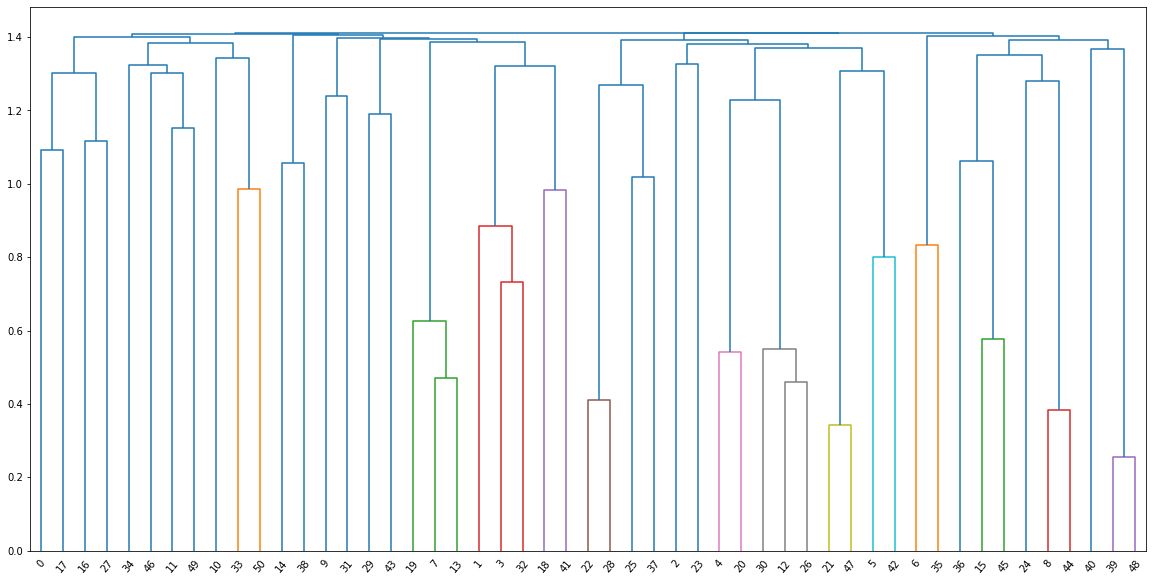

In [78]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize = (20,10))
dendrogram(row_clusters,
           leaf_rotation = 50,
           leaf_font_size = 10)
plt.show()

* 각 단어간 코사인 유사도를 이용한 군집 분석 및 덴드로그램 시각화

In [ ]:
distmatrix = pdist(tfidf_vectors.toarray(), metric = 'cosine')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

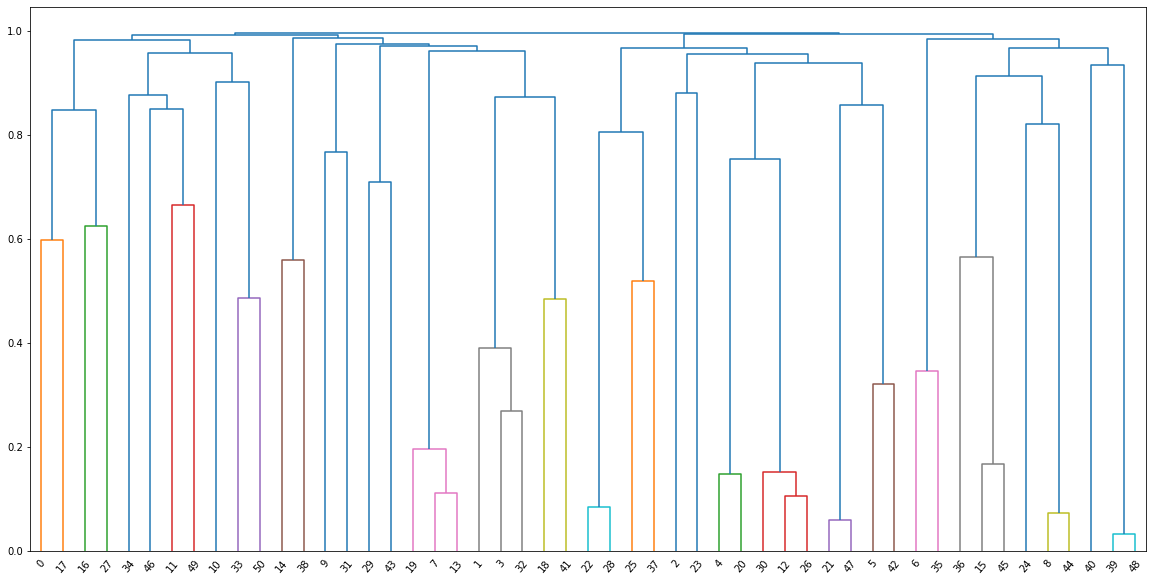

In [80]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize = (20,10))
dendrogram(row_clusters,
           leaf_rotation = 50,
           leaf_font_size = 10)
plt.show()

## 뉴스그룹 군집 분석

### 데이터 로드 및 전처리

In [82]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset = 'train', shuffle = True, remove=('headers','footers','quotes'))
df = pd.DataFrame(news.data, columns = ['corpus'])
df # 전처리가 상당히 많이 필요해보임

,corpus
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,I just installed a DX2-66 CPU in a clone mothe...
11312,\nWouldn't this require a hyper-sphere. In 3-...


In [87]:
# 데이터 전처리(특수문자 제거)
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

# 전처리 함수 만들기
def preprocess_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub('[^A-Za-z]+',' ',text)

  tokens = nltk.word_tokenize(text)
  tokens = [w for w in tokens if not w.lower() in stopwords.words('english')]
  text = ' '.join(tokens)
  text = text.lower().strip()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# 전처리한 결과 cleaned 열에 추가
df['cleaned'] = df['corpus'].apply(preprocess_text)
df

,corpus,cleaned
0,I was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day d...
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...
2,"well folks, my mac plus finally gave up the gh...",well folks mac plus finally gave ghost weekend...
3,\nDo you have Weitek's address/phone number? ...,weitek address phone number like get informati...
4,"From article <C5owCB.n3p@world.std.com>, by to...",article c owcb n p world std com tombaker worl...
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn nyeda cnsvax uwec edu david nye dn neurolog...
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",old mac k mac plus problem screens blank somet...
11311,I just installed a DX2-66 CPU in a clone mothe...,installed dx cpu clone motherboard tried mount...
11312,\nWouldn't this require a hyper-sphere. In 3-...,require hyper sphere space points specifies sp...


### K-means 군집화

In [99]:
# tfidf
vectorizer = TfidfVectorizer(sublinear_tf = True, min_df = 5, max_df = 0.95)
X = vectorizer.fit_transform(df['cleaned'])

In [100]:
# kmeans로 분류
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

clusters = kmeans.labels_
df['cluster'] = clusters

In [101]:
# PCA로 차원축소
pca = PCA(n_components = 2, random_state = 42)

pca_vecs = pca.fit_transform(X.toarray())

df['x0'] = pca_vecs[:,0]
df['x1'] = pca_vecs[:,1]

In [111]:
df = pd.DataFrame(X.todense()).groupby(clusters).mean()
# 중요한 tfidf에 대한 단어들 가져오기
terms = vectorizer.get_feature_names_out()
# 행 기준으로 하나하나 반복해서 각 클러스터별 단어 출력
for i,r in df.iterrows():
  print("Cluster : {}".format(i))
  print('.'.join([terms[t] for t in np.argsort(r)[-10:]]))

Cluster : 0
well.even.know.say.like.god.think.one.would.people
Cluster : 1
time.new.good.know.edu.think.get.like.would.one
Cluster : 2
drive.get.card.would.use.know.please.anyone.windows.thanks


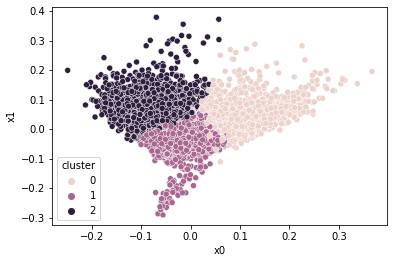

In [105]:
sns.scatterplot(data = df, x='x0', y='x1', hue = 'cluster')

### 병합 군집화

In [106]:
ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
predict = ward.fit_predict(X.toarray())
predict

array([0, 2, 0, ..., 0, 2, 0])

In [107]:
results = df
results['predict'] = predict
results[:10]

,corpus,cleaned,x0,x1,cluster,predict
0,I was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day d...,-0.035129,0.027513,1,0
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...,-0.076532,0.019102,2,2
2,"well folks, my mac plus finally gave up the gh...",well folks mac plus finally gave ghost weekend...,-0.002826,0.126172,2,0
3,\nDo you have Weitek's address/phone number? ...,weitek address phone number like get informati...,-0.053311,0.036368,2,2
4,"From article <C5owCB.n3p@world.std.com>, by to...",article c owcb n p world std com tombaker worl...,-0.008503,0.007069,1,2
5,\n\n\n\n\nOf course. The term must be rigidly...,course term must rigidly defined bill doubt us...,0.048859,-0.017859,1,0
6,There were a few people who responded to my re...,people responded request info treatment astroc...,-0.056961,0.000219,2,0
7,...,shows know much scsi scsi scsi controler chip ...,-0.093744,0.153598,2,2
8,I have win 3.0 and downloaded several icons an...,win downloaded several icons bmp figure change...,-0.064824,0.010195,2,2
9,"\n\n\nI've had the board for over a year, and ...",board year work diskdoubler autodoubler due li...,-0.036241,0.065579,2,2


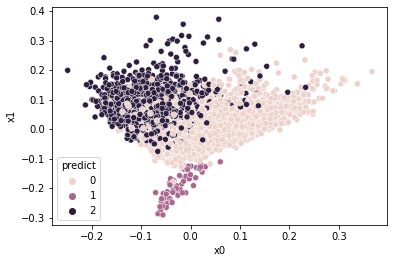

In [110]:
sns.scatterplot(data = results, x='x0', y='x1', hue = 'predict')